## Analysis of Indeed job data

In [115]:
# import modules
import pandas as pd
import numpy as np
import re
import sqlite3

# path = r'.\output\indeed_jobs_scan.xlsx'
# df = pd.read_excel(path)
# df

# print(os.getcwd())
conn = sqlite3.connect(r'indeed_jobs_db.db')
df_DB = pd.read_sql('SELECT * FROM JOBS', con=conn)
df_DB


,job_title,company_name,company_location,salary,date_added,date_scrapped,job_category
0,Senior Data Analyst,XLN Telecom,London SW1P,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None
1,Data Science Analyst,iTechmedia,London,No Salary provided,2022-03-16,2022-03-21 22:19:22.385546,None
2,Behavioural Science Analyst,NHS England and NHS Improvement,London SE1,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None
3,Data Analyst,Mediatonic,London,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None
4,Data Scientist,Government Digital Service,Hybrid remote in London,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None
...,...,...,...,...,...,...,...
731,Market Risk Manager R&ES,Shell,London,No Salary provided,2022-04-04,2022-04-07 22:09:46.557366,unknown
732,Solutions Architect,Plentific,London,No Salary provided,2022-04-07,2022-04-07 22:09:46.557366,unknown
733,Senior Reward Consultant,Elliott Scott HR Recruitment Ltd.,London,No Salary provided,2022-04-04,2022-04-07 22:09:46.557366,unknown
734,Senior Software Engineer (Python),Cazoo,London,No Salary provided,2022-04-06,2022-04-07 22:09:46.557366,Data Engineer


### Cleanup salary

- extract 'year/hour' and push to new column

- Get salary figures, average if two figures, push to new column

In [65]:
df_DB['salary_time'] = df_DB['salary'].str.extract('(year|hour)', flags=re.IGNORECASE)


In [66]:
# sal_df['sal_max'] = sal_df['sal_max'].astype('float')
# sal_df['sal_min'] = sal_df['sal_min'].astype('float')

# sal_df.info()

### Make average salary column

In [119]:
# extract salaries to new DF
sal_df = df_DB['salary'].str.findall(r'(?:£)(\d+[,.]\d+)').apply(pd.Series).replace('[,.]', '', regex=True).rename({0:'sal_min', 1:'sal_max'}, axis=1)

# find average by adding sal_min and sal_max and dividing by two
sal_df['ave_salary'] = (((pd.to_numeric(sal_df['sal_min'], errors='coerce').astype('Int64') 
                            + pd.to_numeric(sal_df['sal_max'], errors='coerce').astype('Int64')) / 2)
                            .fillna(sal_df['sal_min'].astype('float')))


sal_df

,sal_min,sal_max,ave_salary
0,NaN,NaN,<NA>
1,NaN,NaN,<NA>
2,NaN,NaN,<NA>
3,NaN,NaN,<NA>
4,NaN,NaN,<NA>
...,...,...,...
731,NaN,NaN,<NA>
732,NaN,NaN,<NA>
733,NaN,NaN,<NA>
734,NaN,NaN,<NA>


#### Check it worked

Yes looks like it is taking average and when sal_mas is nan it takes sal_min

In [68]:
sal_df[sal_df['sal_min'].notna()].head(10)

,sal_min,sal_max,ave_salary
20,36049,47591,41820.0
21,45839,NaN,45839.0
28,22000,24000,23000.0
31,37197,44802,40999.5
32,31000,35000,33000.0
35,45900,59000,52450.0
36,35000,45000,40000.0
38,27707,60636,44171.5
48,26000,28000,27000.0
59,50000,80000,65000.0


### Merge datasets

In [70]:
df_final = pd.concat([df_DB, sal_df], axis=1)
df_final

,job_title,company_name,company_location,salary,date_added,date_scrapped,job_category,salary_time,sal_min,sal_max,ave_salary
0,Senior Data Analyst,XLN Telecom,London SW1P,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
1,Data Science Analyst,iTechmedia,London,No Salary provided,2022-03-16,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
2,Behavioural Science Analyst,NHS England and NHS Improvement,London SE1,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
3,Data Analyst,Mediatonic,London,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
4,Data Scientist,Government Digital Service,Hybrid remote in London,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
731,Market Risk Manager R&ES,Shell,London,No Salary provided,2022-04-04,2022-04-07 22:09:46.557366,unknown,NaN,NaN,NaN,<NA>
732,Solutions Architect,Plentific,London,No Salary provided,2022-04-07,2022-04-07 22:09:46.557366,unknown,NaN,NaN,NaN,<NA>
733,Senior Reward Consultant,Elliott Scott HR Recruitment Ltd.,London,No Salary provided,2022-04-04,2022-04-07 22:09:46.557366,unknown,NaN,NaN,NaN,<NA>
734,Senior Software Engineer (Python),Cazoo,London,No Salary provided,2022-04-06,2022-04-07 22:09:46.557366,Data Engineer,NaN,NaN,NaN,<NA>


### Dates that scrapper was run

In [71]:
df_final['date_scrapped'].value_counts()

2022-04-07 22:09:46.557366    254
2022-04-04 12:01:37.062915    155
2022-03-28 15:44:22.757903    134
2022-03-21 22:19:22.385546    133
2022-04-04 19:00:53.773373     30
2022-04-07 16:20:30.574076     30
Name: date_scrapped, dtype: int64

### De dup

No dups

In [127]:
df_final[df_final.duplicated()].count()

job_title           0
company_name        0
company_location    0
salary              0
date_added          0
date_scrapped       0
job_category        0
salary_time         0
sal_min             0
sal_max             0
ave_salary          0
dtype: int64

In [123]:
df_final

,job_title,company_name,company_location,salary,date_added,date_scrapped,job_category,salary_time,sal_min,sal_max,ave_salary
0,Senior Data Analyst,XLN Telecom,London SW1P,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
1,Data Science Analyst,iTechmedia,London,No Salary provided,2022-03-16,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
2,Behavioural Science Analyst,NHS England and NHS Improvement,London SE1,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
3,Data Analyst,Mediatonic,London,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
4,Data Scientist,Government Digital Service,Hybrid remote in London,No Salary provided,2022-03-21,2022-03-21 22:19:22.385546,None,NaN,NaN,NaN,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
731,Market Risk Manager R&ES,Shell,London,No Salary provided,2022-04-04,2022-04-07 22:09:46.557366,unknown,NaN,NaN,NaN,<NA>
732,Solutions Architect,Plentific,London,No Salary provided,2022-04-07,2022-04-07 22:09:46.557366,unknown,NaN,NaN,NaN,<NA>
733,Senior Reward Consultant,Elliott Scott HR Recruitment Ltd.,London,No Salary provided,2022-04-04,2022-04-07 22:09:46.557366,unknown,NaN,NaN,NaN,<NA>
734,Senior Software Engineer (Python),Cazoo,London,No Salary provided,2022-04-06,2022-04-07 22:09:46.557366,Data Engineer,NaN,NaN,NaN,<NA>


### Fill blank ave_salary with the median - CONDITIONAL step

In [73]:
# df_final['ave_salary'] = df_final['ave_salary'].fillna(df_final['ave_salary'].median())

## Analysis full time jobs

#### Salary

(143, 11)


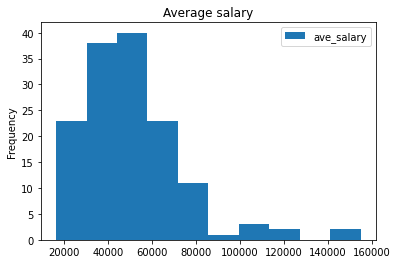

In [74]:
print(df_final.query("salary_time == 'year'").shape)
df_final.query("salary_time == 'year' & ave_salary == ave_salary").plot(kind='hist', title='Average salary');

(143, 11)


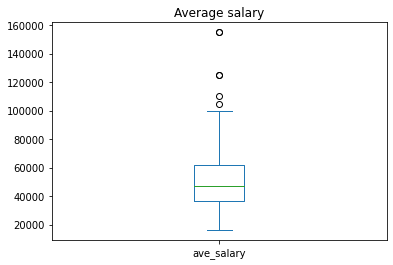

In [75]:
print(df_final.query("salary_time == 'year'").shape)
df_final.query("salary_time == 'year' & ave_salary == ave_salary").plot(kind='box', title='Average salary');

### Descriptive statistics

In [76]:
df_final.describe()

,ave_salary
count,143.000000
mean,51780.863636
std,23618.213237
min,16260.000000
25%,36403.000000
50%,47450.000000
75%,62000.000000
max,155000.000000


## Analysis contract type jobs

#### Rate of pay for hourly pay

(4, 11)


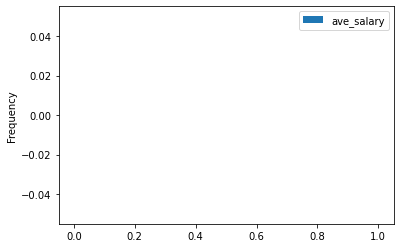

In [77]:
print(df_final.query("salary_time == 'hour'").shape)
df_final.query("salary_time == 'hour' & ave_salary == ave_salary").plot.hist();

(4, 11)


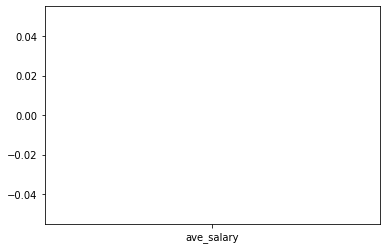

In [78]:
print(df_final.query("salary_time == 'hour'").shape)
df_final.query("salary_time == 'hour' & ave_salary == ave_salary").plot(kind='box');

### Company

Lets look at the companies most job adds

<AxesSubplot:>

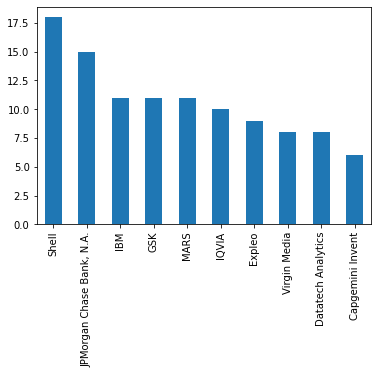

In [79]:
df_final['company_name'].value_counts().nlargest(10).plot.bar()

### Highest salary by company

In [80]:
df_final.query("ave_salary > 0").filter(['company_name', 'job_title', 'ave_salary']).sort_values(by='ave_salary', ascending=False).head(10)

,company_name,job_title,ave_salary
569,Digital Waffle,Principle Data Analytics Consultant,155000.0
438,Digital Waffle,Principle Data Analytics Consultant,155000.0
256,Oliver James Associates,Senior Data Solution Architect,125000.0
251,BCT Resourcing,Senior Data Solution Architect,125000.0
727,Client Server,Software Developer C# .Net Core Data Cloud,110000.0
247,La Fosse Associates,Lead Data Engineer,105000.0
721,Technical Resources Ltd,Senior/Principal Data Engineer GCP,100000.0
208,Intellectual Property Office,Director of the Intellectual Property Framework,94400.0
695,Taylor Root Global Legal Recruitment,Model Validation Manager,85000.0
120,LexisNexis®️ Risk Solutions Group,Software Engineering Lead ICIS Sutton,82500.0


### Lowest salary by company

In [81]:
df_final.query("ave_salary > 0").filter(['company_name', 'job_title', 'ave_salary']).sort_values(by='ave_salary', ascending=True).head(10)

,company_name,job_title,ave_salary
353,The Institute of Cancer Research,Student Placement - Clinical Trial Assistant (...,16260.0
89,Cathcart Associates,Graduate Database Support Analyst,21000.0
127,HeadStart Speech & Behaviour Therapies,ABA Tutor - Autism,21710.0
711,Client Server,IT Support / Operations Analyst SQL - E-commerce,22000.0
28,The Monarch Partnership Limited,Junior Pricing Analyst,23000.0
408,TalentPool,Business Insight Analyst,23000.0
673,Graduate Recruitment Bureau,Graduate German Speaking Digital Marketing Ana...,24000.0
565,I.T. Associates Ltd,Junior Procim Support/Business Analyst – 23 to...,25500.0
159,Department for Transport,Analysis Officer,26126.0
504,Natural England,Earth Observation Analyst,26224.0


## Job title

In [82]:
df_final['job_title'].value_counts().head(10)

Data Analyst              29
Senior Data Analyst       15
Data Scientist            14
Data Engineer             12
Business Analyst           9
Senior Analyst             6
Product Analyst            6
Senior Insight Analyst     5
Quantitative Analyst       5
Analyst                    5
Name: job_title, dtype: int64

### Make salary column floats

In [83]:
df_final[['sal_min', 'sal_max']] = df_final[['sal_min', 'sal_max']].astype('float')

### Salary by job Category

In [137]:
# Just do average of average as quick 
df_final.groupby(['job_category']).agg({'ave_salary' :['mean', 'count'], 'job_title' : 'count'})

ave_salary       job_title
                     mean count     count
job_category                             
Data Analyst    41204.025    40       192
Data Engineer     65602.0     3        21
Data Scientist       <NA>     0         7
unknown         72191.875    20        94

#### Data Analyst salaries

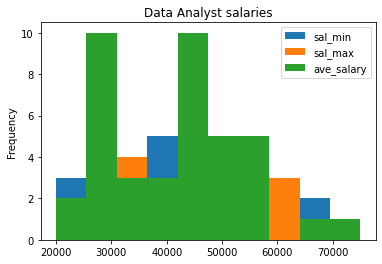

In [133]:
df_final.groupby(['job_category']).get_group('Data Analyst').plot.hist(title='Data Analyst salaries');

#### Data Engineer salaries

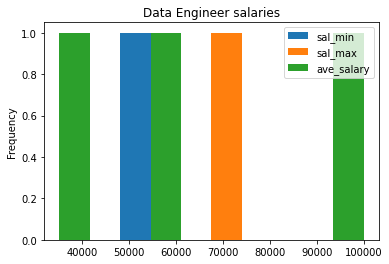

In [134]:
df_final.groupby(['job_category']).get_group('Data Engineer').plot.hist(title='Data Engineer salaries');

#### Uncategorised roles salaries

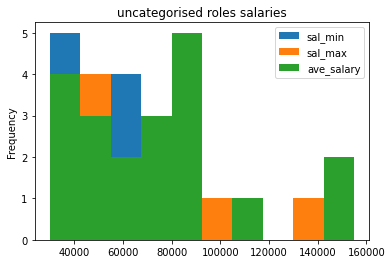

In [138]:
df_final.groupby(['job_category']).get_group('unknown').plot.hist(title='uncategorised roles salaries');

In [113]:
df_final[df_final['job_category'] == 'Data Scientist']

,job_title,company_name,company_location,salary,date_added,date_scrapped,job_category,salary_time,sal_min,sal_max,ave_salary
434,Associate Data Scientist,Government Digital Service,Hybrid remote in London,No Salary provided,2022-04-04,2022-04-04 19:00:53.773373,Data Scientist,NaN,NaN,NaN,<NA>
516,Data Scientist,NatWest Group,London,No Salary provided,2022-04-04,2022-04-07 22:09:46.557366,Data Scientist,NaN,NaN,NaN,<NA>
602,Data Scientist,MARS,London W1D+1 location,No Salary provided,2022-04-01,2022-04-07 22:09:46.557366,Data Scientist,NaN,NaN,NaN,<NA>
612,"Research Scientist, Audio Intelligence",Spotify,Temporarily Remote in London,No Salary provided,2022-04-05,2022-04-07 22:09:46.557366,Data Scientist,NaN,NaN,NaN,<NA>
629,Senior Data Scientist Chemicals,RELX,London,No Salary provided,2022-04-06,2022-04-07 22:09:46.557366,Data Scientist,NaN,NaN,NaN,<NA>
661,"Senior Research Scientist, Community Operations",Amazon Business EU SARL (UK),London,No Salary provided,2022-04-05,2022-04-07 22:09:46.557366,Data Scientist,NaN,NaN,NaN,<NA>
724,Senior Data Scientist Chemicals,Risk Solutions,London,No Salary provided,2022-04-06,2022-04-07 22:09:46.557366,Data Scientist,NaN,NaN,NaN,<NA>
